In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
f = open('hurriyet.txt', 'r', encoding='utf8')
text = f.read()
t_list = text.split('\n')

corpus = []

for cumle in t_list:
    corpus.append(cumle.split())

In [4]:
corpus[1]

['gösterilerde',
 'fitnecilere',
 'ölüm',
 'münafıklara',
 'ölüm',
 'abd',
 'ye',
 'ölüm',
 'ingiltere',
 'ye',
 'ölüm',
 'sloganları',
 'atıldı']

In [5]:
corpus[2]

['dini',
 'lider',
 'ali',
 'hamaney',
 've',
 'cumhurbaşkanı',
 'mahmud',
 'ahmedinejad',
 'ı',
 'destekleyen',
 'iranlılar',
 'son',
 'olaylarda',
 'yeğeni',
 'öldürülen',
 'mir',
 'hüseyin',
 'musevi',
 'başta',
 'olmak',
 'üzere',
 'muhalefet',
 'liderlerini',
 'kınadılar']

In [6]:
corpus[3]

['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu']

In [7]:
# KElime vektorleri 100 uzunlugunda
# merkezdeki kelimenin sag ve solunda +5,-5 kelimeye bakiyor
# min_count=5 nadir kelimeleri ele
# sg=1 skip-gram

model = Word2Vec(corpus, size=100, window=5, min_count=5, sg=1)

In [8]:
model.wv['ankara']

array([ 0.19575559,  0.35017854,  0.25173855, -0.08910054,  0.02444662,
        0.38690767,  0.20764998, -0.15083487, -0.06397306, -0.66458714,
       -0.0027776 ,  0.00984157, -0.35492024, -0.22051787,  0.36155212,
       -0.10486265,  0.32090744, -0.3943038 , -0.03786726, -0.61226547,
       -0.33510756, -0.05894455,  0.3140096 , -0.3469945 , -0.2010587 ,
       -0.06232522,  0.5500902 ,  0.15434141, -0.10061239,  0.9805595 ,
        0.12953892, -0.3726742 , -0.40078366, -0.11092606, -0.05134759,
       -0.1454471 ,  0.17547765,  0.2063025 , -0.09011877, -0.19646363,
       -0.00602412, -0.0673573 ,  0.1852906 ,  0.0761466 ,  0.6494036 ,
        0.15471736, -0.6709276 ,  0.21234304,  0.18898238, -0.35279584,
       -0.143019  ,  0.05806226,  0.00867872, -0.47965464,  0.27449298,
       -0.2761012 , -0.67503077, -0.36493978,  0.89173037,  0.39430934,
       -0.20367211, -0.09984584,  0.5630109 ,  0.19490868, -0.21670856,
        0.02910584,  0.2121772 ,  0.5606531 , -0.12822554, -0.02

In [9]:
model.wv.most_similar('youtube')

[('twitter', 0.7543126344680786),
 ('facebook', 0.7330607175827026),
 ('whatsapp', 0.7320181131362915),
 ('paylaşım', 0.7231199741363525),
 ('twıtter', 0.7213077545166016),
 ('internete', 0.7190455198287964),
 ('sitelerine', 0.6985442638397217),
 ('video', 0.6880125403404236),
 ('sayfasına', 0.6814849376678467),
 ('sitelere', 0.6756142377853394)]

# Modeli kaydetmek

In [10]:
model.save('word2vec.model')

In [11]:
model = Word2Vec.load('word2vec.model')

In [20]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

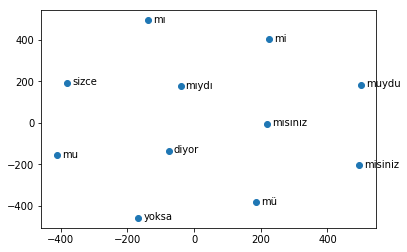

In [21]:
closestwords_tsneplot(model, 'mu')

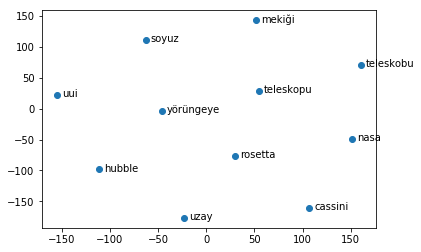

In [22]:
closestwords_tsneplot(model, 'uzay')

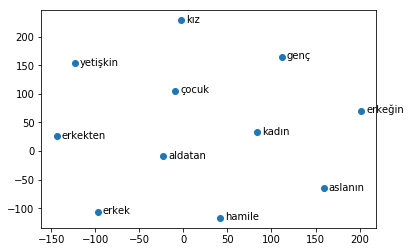

In [23]:
closestwords_tsneplot(model, 'erkek')

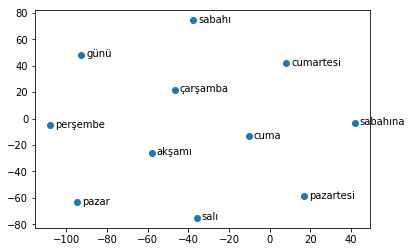

In [24]:
closestwords_tsneplot(model, 'pazartesi')

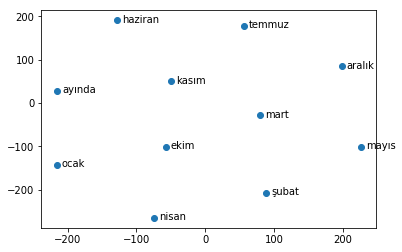

In [25]:
closestwords_tsneplot(model, 'kasım')

In [45]:
model.most_similar(positive=['akşam', 'bugün'], negative=['sabah'], topn=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('yarın', 0.760185956954956)]

In [47]:
model.most_similar(positive=['akşam', 'sonra'], negative=['sabah'], topn=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('önce', 0.7273145914077759)]

In [51]:
model.most_similar(positive=['anne', 'baba'], negative=['kadın'], topn=5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('babası', 0.6680014133453369),
 ('babasını', 0.6415079832077026),
 ('ablası', 0.6303805708885193),
 ('annesi', 0.6257779002189636),
 ('kızının', 0.6180100440979004)]

In [66]:
model.most_similar(positive=['iyi', 'suçlu'], negative=['kötü'], topn=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('suçsuz', 0.5983903408050537)]